<a href="https://colab.research.google.com/github/jacob-jones23/MAT-422/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**3.4 Logistic Regression**
Given the input data is of the form {(α$_{i}$,b$_{i}$): *i* = 1,...,*n*} where α$_{i}$ ∈ ℝ$^{d}$ are the features and *b*$_{i}$ ∈ {0,1} is the label. As before we use a matrix representation: *A* ∈ ℝ$^{n x d}$ has rows α$_{j}^{T}$, *j* = 1,...,*n* and **b** = (*b*$_{1}$,...,*b*$_{n}$)$^{T}$ ∈ {0,1}$^{n}$. We wish to find a function of the features that approximates the probability of the label 1. For this purpose, we model the logit function of the probability of lable 1 as a linear function of the features.

For **x**, α∈ ℝ$^{d}$, let *p*(α; **x**) be the probability of the output to be 1, we define

\begin{align}
log \frac{p(α;\mathbf{x})} {1-p(α;\mathbf{x})} = α^{T}\mathbf{x}
\end{align}

Here α$^{T}$**x** = ∑*x$_{i}$α$_{i}$* can be viewed as a regression problem which seeks the best parameters (**x**) with given data (α). Rearranging this expression gives
\begin{align}
p(α;\mathbf{x}) = σ(α^T\mathbf{x})
\end{align}

where the sigmoid function is
\begin{align}
σ(t) = \frac{1} {1+e^{-t}}
\end{align}

for *t* ∈ ℝ. To maximize the likelihood of the data, we assume the labels are independent given the features, which is given by
\begin{align}
ℒ(\mathbf{x};A,\mathbf{b}) = \prod_{i=1}^{n}p(α_{i};\mathbf{x})^{b_i}(1-p(α_i;\mathbf{x}))^{1-b_i}
\end{align}

Taking a logarithm, multiplying by -1/n and substituting the sigmoid function, we want to minimize the cross-entropy loss.
\begin{align}
l(\mathbf{x};A,\mathbf{b}) = -\frac{1}{n}\sum_{i=1}^{n}b_{i}\text{log}(σ(α^T\mathbf{x}))-\frac{1}{n}\sum_{i=1}^{n}(1-b_i)\text{log}(1-σ(α^T\mathbf{x})).
\end{align}

That is, we solve
\begin{align}
\min_{x∈ℝ^d}l(\mathbf{x};A,\mathbf{b}).
\end{align}

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()
# Print to show there are 1797 images (8 by 8 images for a dimensionality)
print('Image Data Shape', digits.data.shape)
#Print to show there are 1797 labels (integers from 0-9)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


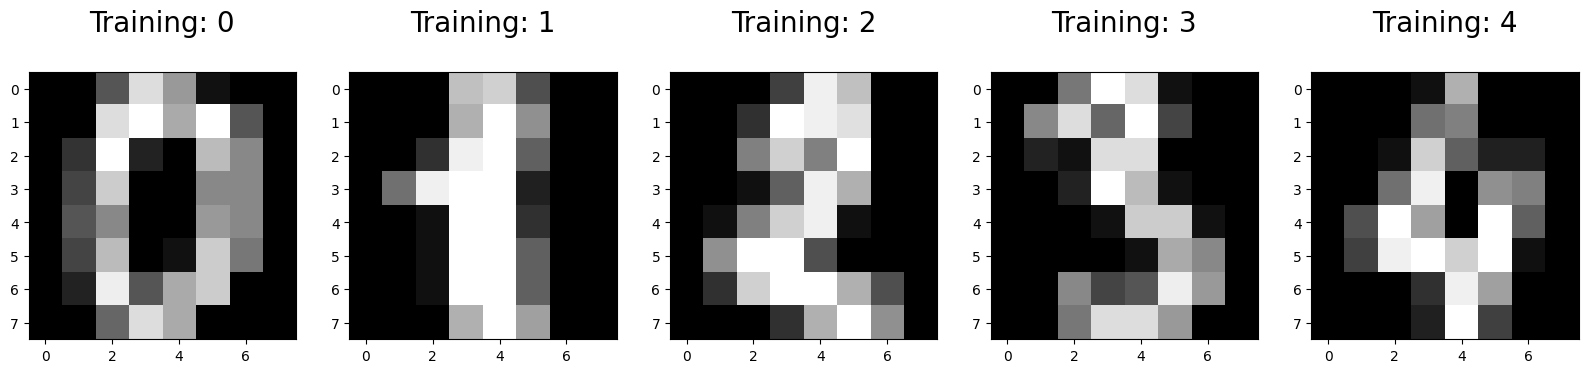

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
  plt.subplot(1,5,index + 1)
  plt.imshow(np.reshape(image,(8,8)), cmap=plt.cm.gray)
  plt.title('Training: %i\n' % label, fontsize = 20)

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

In [4]:
from sklearn.linear_model import LogisticRegression

In [5]:
logisticRegr = LogisticRegression()

In [6]:
logisticRegr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [7]:
# Return a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [8]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [12]:
predictions = logisticRegr.predict(x_test)

In [9]:
#Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [13]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


Text(0.5, 1.0, 'Accuracy Score: 0.9511111111111111')

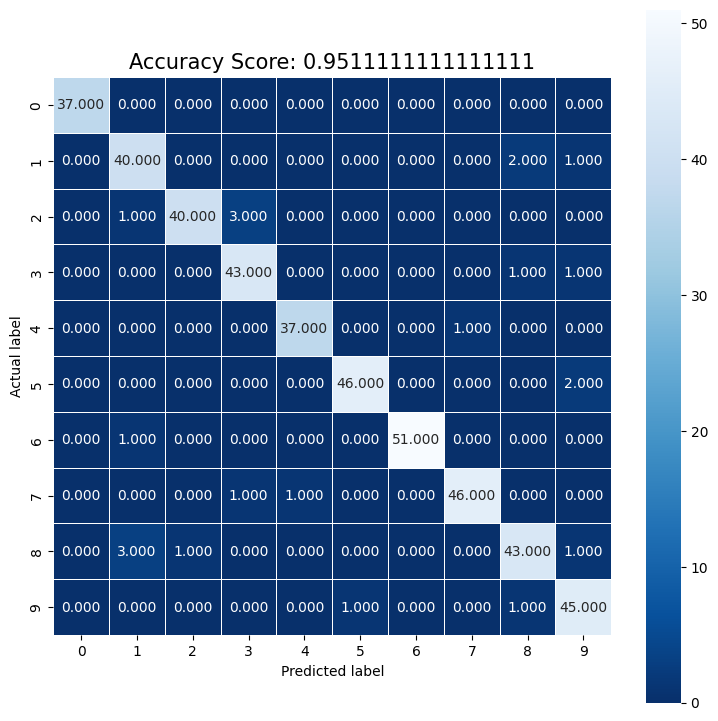

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=0.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size =15)


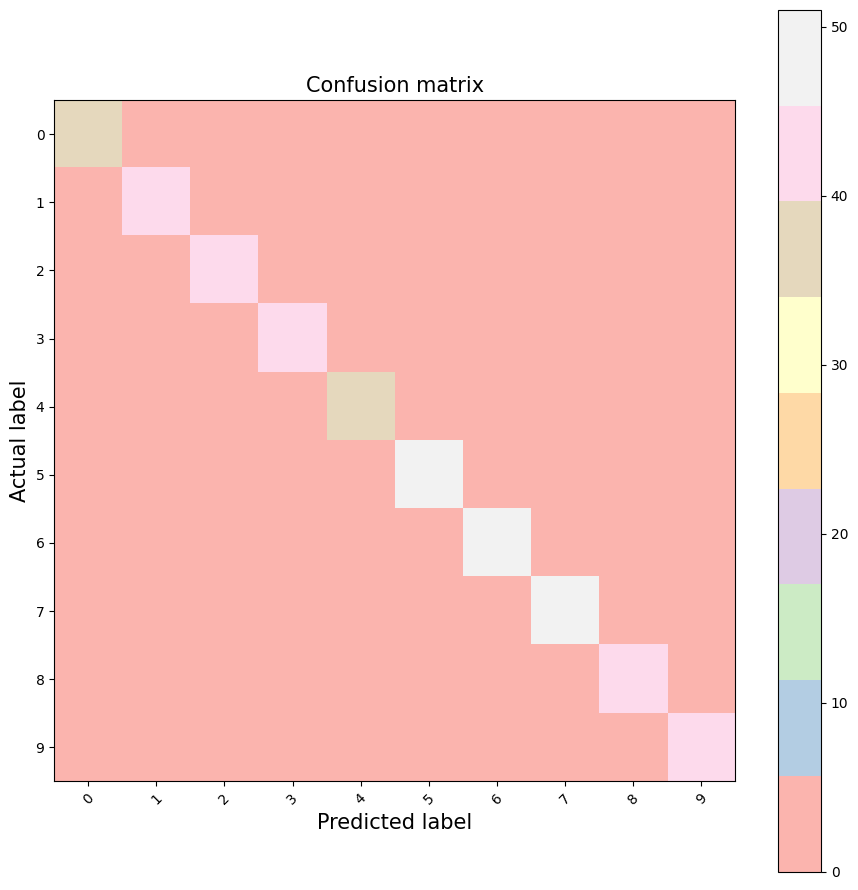

In [16]:
plt.figure(figsize=(9,9))
plt.imshow(cm, interpolation='nearest', cmap='Pastel1')
plt.title('Confusion matrix', size = 15)
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], rotation=45, size = 10)
plt.yticks(tick_marks, ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"], size = 10)
plt.tight_layout()
plt.ylabel('Actual label', size = 15)
plt.xlabel('Predicted label', size = 15)
width, height = cm.shape

In [18]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [19]:
# Here are the images
# There are 70,000 images
print(mnist.data.shape)
# These are the labels
print(mnist.target.shape)

(70000, 784)
(70000,)


In [30]:
from sklearn.model_selection import train_test_split
train_img, test_img, train_lbl, test_lbl = train_test_split(
    mnist.data, mnist.target, test_size = 1/7.0, random_state=0)

In [48]:
from sklearn.linear_model import LogisticRegression

In [51]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why you change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [55]:
logisticRegr.fit(train_img, train_lbl)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
logisticRegr.predict(test_img[0:10])

array(['0', '4', '1', '2', '4', '7', '7', '1', '1', '7'], dtype=object)

In [57]:
predictions = logisticRegr.predict(test_img)

In [59]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9184


In [60]:
import numpy as np
import matplotlib.pyplot as plt
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict:
  misclassifiedIndexes.append(index)
  index +=1